# Practical work on SAR statistics

### Emanuele DALSASSO, Florence TUPIN

### Study of homogeneous areas

You have at your disposal a set of images coming from different sensors and with different characteristics on the same area of Flevoland in Netherlands (for each sensor and acquisition mode, an homogeneous area of sea has been selected with *mer* extension, and an area of farmland with  *centre* extension):
- Sentinel-1 sensor (ESA), SLC (Single look Complex) data and GRD (Ground Range Detected) data ;
- ERS sensor (ESA), PRI product (ground range data);
- Alos sensor (JAXA), SLC (Single look Complex) data.

Some useful functions are available in the file *mvalab.py*.

### Name: **WRITE YOUR NAME HERE**

#### Instructions

To solve this practical session, answer the questions below. Then export the notebook with the answers using the menu option **File -> Download as -> Notebook (.ipynb)**. Then [submit the resulting file here](https://partage.imt.fr/index.php/s/ktEXWy7ZABKin9Z) by next week. 

### Import the libraries and packages we are going to use
The following cell imports all that is going to be necessary for the practical work

In [1]:
!wget https://perso.telecom-paristech.fr/dalsasso/TPSAR/mvalab.py

--2022-03-14 12:48:10--  https://perso.telecom-paristech.fr/dalsasso/TPSAR/mvalab.py
Resolving perso.telecom-paristech.fr (perso.telecom-paristech.fr)... 137.194.22.227, 2a04:8ec0:0:a::89c2:16e3
Connecting to perso.telecom-paristech.fr (perso.telecom-paristech.fr)|137.194.22.227|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68071 (66K) [text/x-python]
Saving to: ‘mvalab.py’

mvalab.py           100%[===================>]  66.48K  --.-KB/s    in 0.1s    

2022-03-14 12:48:11 (467 KB/s) - ‘mvalab.py’ saved [68071/68071]



In [2]:
import scipy
from scipy import signal
import scipy.signal
import scipy as spy
import scipy.fftpack
from scipy import ndimage
from scipy import special
from scipy import ndimage
import numpy as np
import math
import matplotlib.pyplot as plt
import mvalab as mvalab
from urllib.request import urlopen
import cmath


plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams['figure.max_open_warning'] = 30

## A. Single look data distributions 
In this part, we will use an SLC (Single Look Complex) image and analyze its pdf. 
The image has been acquired by the Sentinel-1 sensor over the Lelystad zone (very flat area with fields crops). 
Vizualize the amplitude image and interpret it. You may want to have a look to an [optical image](https://goo.gl/maps/JJcYcRjMKj1p6uqW8) of the area

N.B.: An amplitude image is given by the modulus of the electro-magnetic field and intensity is the square of the amplitude (proportional to the signal power). 

imz2mat : version janvier 2018.  Fichier à ouvrir : https://perso.telecom-paristech.fr/dalsasso/TPSAR/pilelely/Lely.CXF
Nom compatible url
Nom compatible url
Complex float, Fichiers PC
INFO - reading header/dim : https://perso.telecom-paristech.fr/dalsasso/TPSAR/pilelely/Lely.dim
lecture .dim OK -> largeur:3072 hauteur:1024 profondeur:1
Debug 2 4 3072
4 3072 <f
Affichage d'une image complexe : on prend le module
plt.show dans visusar : image 3072 x 1024


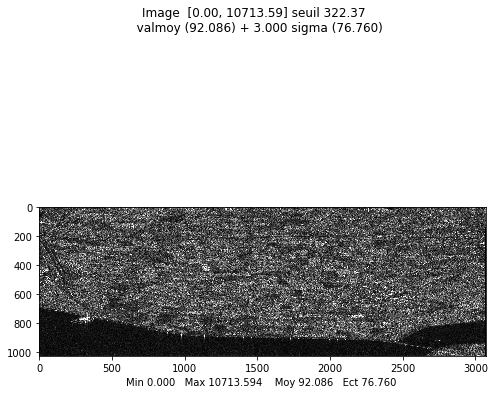

array([[189.39645707, 120.37768382,  88.18239552, ...,  94.14325886,
          0.        ,   0.        ],
       [ 82.14861489, 182.63059347, 129.35037906, ...,  67.3348992 ,
          0.        ,   0.        ],
       [ 70.72612706,  95.41594535, 172.73440866, ...,  74.43037812,
          0.        ,   0.        ],
       ...,
       [ 30.79130525,  33.76073253,  44.75881951, ...,   0.        ,
          0.        ,   0.        ],
       [ 20.16361244,  27.22908724,  75.69400436, ...,   0.        ,
          0.        ,   0.        ],
       [ 23.75550729,  55.26063905, 120.77507429, ...,   0.        ,
          0.        ,   0.        ]])

In [3]:
pageweb="https://perso.telecom-paristech.fr/dalsasso/TPSAR/pilelely/"
image='Lely.CXF'
im_slc_senti_lely_liste=mvalab.imz2mat(pageweb+image);
im_slc_senti_lely = im_slc_senti_lely_liste[0]
ncol=im_slc_senti_lely_liste[1]
nlig=im_slc_senti_lely_liste[2]

mvalab.visusar(im_slc_senti_lely)

### Question 1
#### Data distributions for an homogeneous area
Select a physically homogeneous area (you can zoom and see coordinates as you move the arrow on the image) and compute the distribution of the real part, imaginary part, phase, intensity and amplitude. Some useful functions are:
- `np.angle`
- `np.real`
- `np.imag` 

Did you find the distributions seen during the course for the Goodman model of speckle? 

Then, estimate the coefficient of variation:  
$\gamma=\frac{\sigma}{\mu}$

____________
### Answer 1
The amplitude follows a Rayleigh law. The intensity follows a decreasing exponential law. The phase follows a uniform law on [-pi,pi]. The real and imaginary parts follow Gaussian laws. Therefore we get all the results of the Goodman model.

### Answer 1

Affichage d'une image complexe : on prend le module
plt.show dans visusar : image 105 x 53


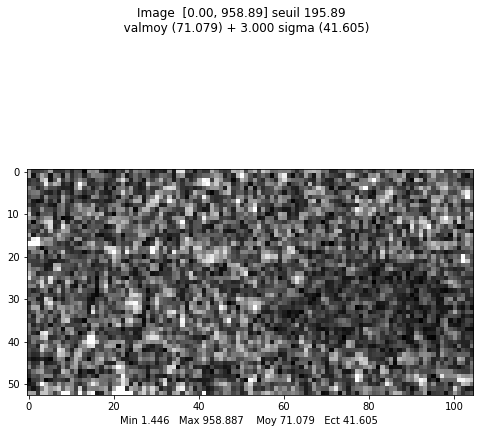

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys


In [32]:
# Select a crop of the image (around 200 by 200 pixels)
crop_slc = im_slc_senti_lely[740:793,1067:1172] #complete
mvalab.visusar(crop_slc)

# Compute amplitude, intensity, phase, real and imaginary part
amp_senti_lely = np.abs(crop_slc)
int_senti_lely = np.multiply(crop_slc, np.conjugate(crop_slc)).astype(np.float32)
ph_senti_lely = np.angle(crop_slc)
real_senti_lely = np.real(crop_slc)
imag_senti_lely = np.imag(crop_slc)

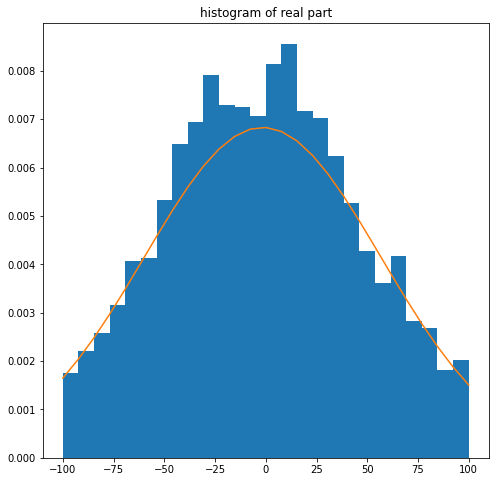

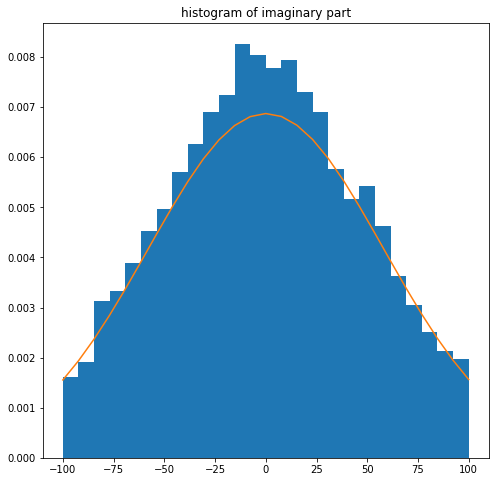

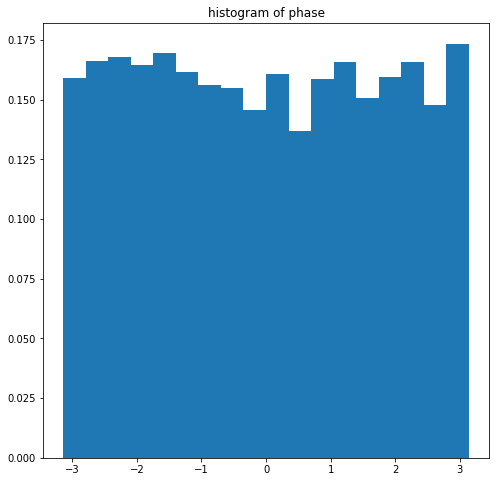

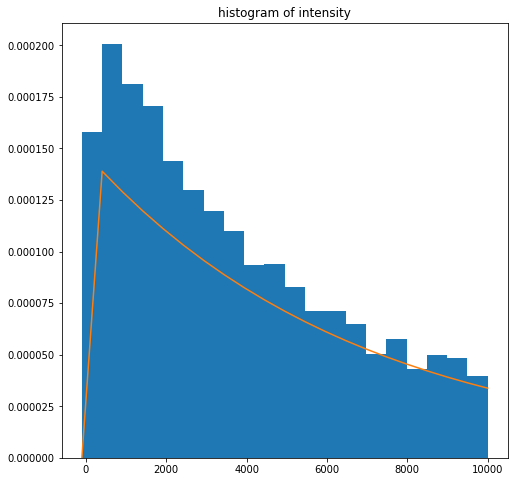

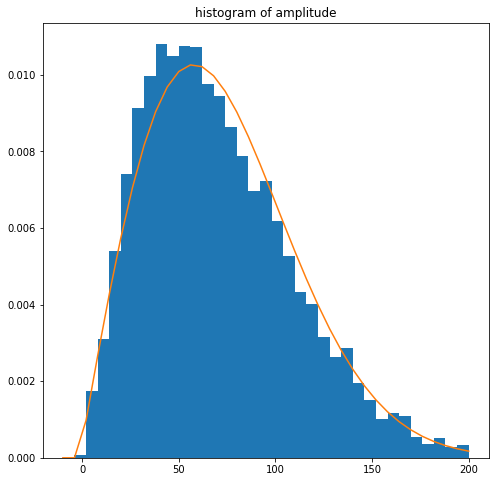

In [39]:
# Plot the histograms and verify they match the theoretical distribution

# fitting of the distributions 
# use the following ones :
# Gaussian pdf : scipy.stats.norm
# Rayleigh pdf : scipy.stats.rayleigh
# Exponential pdf : scipy.stats.expon

#example for real part of the data 
plt.figure()
_, bins, _ = plt.hist(real_senti_lely.ravel(),bins='auto',density=True,range=[-100,100])  # Gaussian distribution
mu, sigma = scipy.stats.norm.fit(real_senti_lely)
best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma) 
plt.plot(bins, best_fit_line)
plt.title('histogram of real part')
plt.show()

#complete for imaginary part: Gaussian distribution
plt.figure()
_, bins, _ = plt.hist(imag_senti_lely.ravel(),bins='auto',density=True,range=[-100,100])  #complete
mu, sigma = scipy.stats.norm.fit(imag_senti_lely)
fit_line = scipy.stats.norm.pdf(bins, mu, sigma) 
plt.plot(bins, fit_line)
plt.title('histogram of imaginary part')
plt.show()


#complete for phase data: Uniform distribution
plt.figure()
plt.hist(ph_senti_lely.ravel(),bins='auto',density=True,range=[-np.pi,np.pi]) #complete
plt.title('histogram of phase')
plt.show()


#complete for intensity data: Exponential (Gamma) distribution
plt.figure()
_, bins, _ = plt.hist(int_senti_lely.ravel(),bins='auto',density=True,range=[-100,10000])  #complete
loc, scale = scipy.stats.expon.fit(int_senti_lely)
fit_line = scipy.stats.expon.pdf(bins, loc=loc, scale=scale)  #complete
plt.plot(bins, fit_line)
plt.title('histogram of intensity')
plt.show()

#complete for amplitude data: Rayleigh distribution
plt.figure()
_, bins, _ = plt.hist(amp_senti_lely.ravel(),bins='auto',density=True,range=[-10,200])  #complete
mu, sigma = scipy.stats.rayleigh.fit(amp_senti_lely)
fit_line = scipy.stats.rayleigh.pdf(bins, mu, sigma)
plt.plot(bins, fit_line)
plt.title('histogram of amplitude')
plt.show()

In [31]:
# Compute the coefficient of variation on the homogeneous crop in intensity
m_A = np.mean(amp_senti_lely)
sigma_A = np.std(amp_senti_lely)
coeff_var_A = sigma_A/m_A
print("Variance Amplitude " + str(coeff_var_A))

m_I = np.mean(int_senti_lely) #complete
sigma_I = np.std(int_senti_lely) #complete
coeff_var_I = sigma_I/m_I 
print("Variance Intensité " + str(coeff_var_I))

Variance Amplitude 0.5853388188236309
Variance Intensité 2.1298344


## B. Spatial multi-looking of data
A common way to reduce the speckle is to multi-look the data, i.e. through a non-coherent average of several samples (called looks) in intensity format, leading to the maximum likelihood estimator of the underlying reflectivity. 


### Question 2

Compute a multi-look down-sampled image of Lely SLC data `im_slc_senti_lely` using a factor of 1 in the vertical direction and 4 in horizontal (this will give almost square pixels). You can do so by convolving the image with an average window with the aforementioned dimensions. Use `signal.convolve2d` with `mode = 'same'`.

Comment the effect of multi-looking. 

Multilooking is computed both in intensity and in amplitude format. Can you see the differences?

______________
### Answer 2

Multiview reduces the size of the image in the horizontal direction, the pixels are square. There is less noise, and the pixels are isotropic which makes the image more easily interpretable.

The results of multilooking in amplitude and intensity look very similar.

In the ratio image, however, there are small differences. The ratio looks quite uniform, but around bright spots we see small anomalies. This is the multiplicative bias, which is higher on area with a lot of backscattering power.
With the average in amplitude we need to correct this multiplicative bias. This shows that the averaging techniques do not have exactly the same effect around the very bright points. 


### Answer 2

Affichage d'une image complexe : on prend le module
plt.show dans visusar : image 768 x 1024


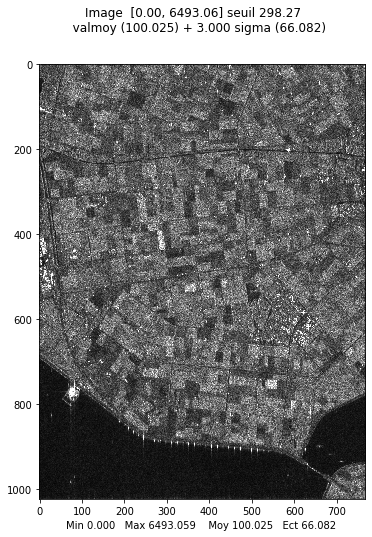

Text(0.5, 0.98, 'SENTINEL : Multivue en intensité')

<Figure size 576x576 with 0 Axes>

In [42]:
# Create the mask that will be used to average pixels within the horizontal window of dimension 4
masque_h = np.ones((1,4))/4 #complete

# Compute multilooking in intensity by convolving the entire image with the window just created
sentinel_ml_int = signal.convolve2d(np.multiply(im_slc_senti_lely,np.conj(im_slc_senti_lely)),masque_h,mode='same')
 #complete

# Downsample the image by a factor of 4, so to have squared pixels 
mvalab.visusar(np.sqrt(sentinel_ml_int[:,::4])) 
plt.suptitle(u'SENTINEL : Multilook in intensity')

Affichage d'une image reelle
plt.show dans visusar : image 768 x 1024


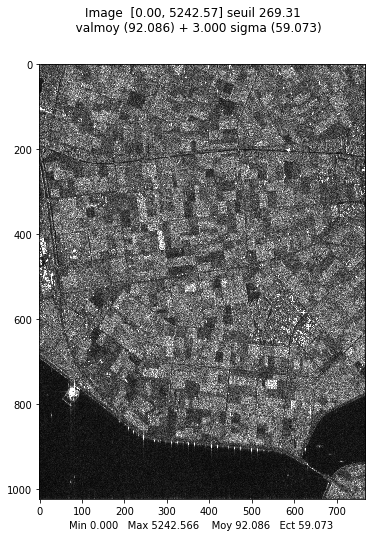

Text(0.5, 0.98, 'SENTINEL : Multivue en amplitude')

<Figure size 576x576 with 0 Axes>

In [43]:
# Compute multilooking in amplitude
sentinel_ml_amp = signal.convolve2d(np.abs(im_slc_senti_lely),masque_h,mode='same')

# Downsample the image by a factor of 4, so to have squared pixels, and plot it in amplitude 
mvalab.visusar(sentinel_ml_amp[:,::4]) 
plt.suptitle(u'SENTINEL : Multivue en amplitude')

Affichage d'une image reelle
plt.show dans visusar : image 768 x 1024


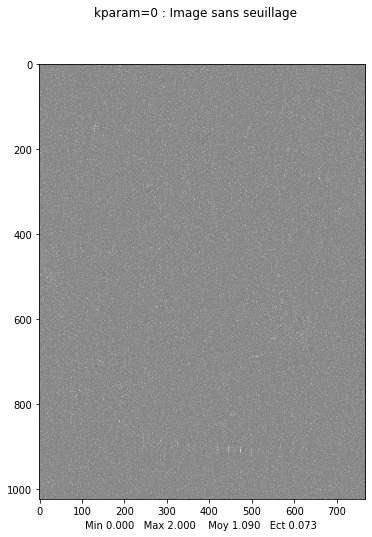

array([[1.44888997, 1.13605928, 1.027601  , ..., 1.15876138, 1.12063038,
        1.06476235],
       [1.51262355, 1.10928094, 1.03185534, ..., 1.08236587, 1.16597056,
        1.20760155],
       [1.42974365, 1.01877367, 1.0321877 , ..., 1.05277908, 1.1785841 ,
        1.1653446 ],
       ...,
       [1.41570818, 1.07378924, 1.04754162, ..., 1.01940668, 1.03687131,
        1.99999917],
       [1.42984211, 1.05439365, 1.00073457, ..., 1.08318317, 1.00794446,
        1.99999928],
       [1.5224812 , 1.03794217, 1.01279235, ..., 0.        , 0.        ,
        0.        ]])

In [46]:
# Compute the ratio between the multilooked intensity and amplitude to see the differences.
# WARNING: prevent division by 0
ratio = np.divide(np.sqrt(sentinel_ml_int[:,::4]), sentinel_ml_amp[:,::4]+1e-5)
ratio = np.abs(ratio).astype(np.float32)
mvalab.visusar(ratio,0)

## C. Computation of the Equivalent Number of looks on homogeneous areas
In this part you have at your disposal 2 images of a part of the sea. One is a Sentinel-1 GRD image and the other one is an ERS image. The multi-looking has been done by the data provider (ESA, European Space Agency).
Use the value of the coefficient of variation to find the Equivalent Number of Looks (ENL) of the Sentinel-1 GRD and ERS data. 
The formula is :
- $\gamma_I=\frac{1}{\sqrt{L}}$ for intensity data 
- $\gamma_A=\frac{0.523}{\sqrt{L}}$

knowing that the ENL should be an integer corresponding to the number of aberaged samples. 




### Question 3
Comment the number of looks you have found for GRD and ERS data.
____________
### Answer 3

For Sentinel1-GRD, we obtain about the 5 expected real views, as we find 4.79 in amplitude.

For ERS, we get 2.69 in amplitude, which is about 3 real views.

If the estimate of L is good, we do not obtain exact values because the Goodman conditions are not respected.

### Answer 3

imz2mat : version janvier 2018.  Fichier à ouvrir : https://perso.telecom-paristech.fr/tupin/TPSAR/DATA/images/SentinelGRD_flevoland_mer.imw
Nom compatible url
Nom compatible url
Unsigned short, Fichiers Unix
INFO - reading header/dim : https://perso.telecom-paristech.fr/tupin/TPSAR/DATA/images/SentinelGRD_flevoland_mer.dim
lecture .dim OK -> largeur:512 hauteur:512 profondeur:1
Debug 1 2 512
2 512 >H
Affichage d'une image reelle
plt.show dans visusar : image 512 x 512


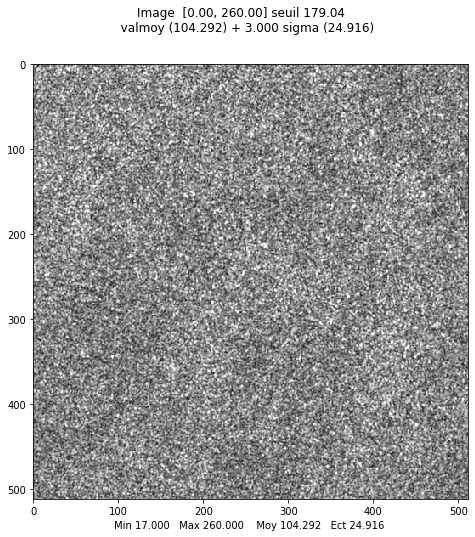

--- coeff var and L ---
0.23890486126419946
4.792403800535571


In [47]:
pageweb='https://perso.telecom-paristech.fr/tupin/TPSAR/DATA/images/'
image = 'SentinelGRD_flevoland_mer.imw'
im_sentigrd_mer = mvalab.imz2mat(pageweb+image)
mvalab.visusar(np.abs(im_sentigrd_mer[0]))

# compute coefficient of variation and number of looks
coeff_var_grd = np.std(np.abs(im_sentigrd_mer[0]))/np.mean(np.abs(im_sentigrd_mer[0])) # amplitude
L_grd = np.square(0.523/coeff_var_grd) #complete
print('--- coeff var and L ---')
print(coeff_var_grd)
print(L_grd)

imz2mat : version janvier 2018.  Fichier à ouvrir : https://perso.telecom-paristech.fr/tupin/TPSAR/DATA/images/ERS_flevoland_mer.imw
Nom compatible url
Nom compatible url
Unsigned short, Fichiers Unix
INFO - reading header/dim : https://perso.telecom-paristech.fr/tupin/TPSAR/DATA/images/ERS_flevoland_mer.dim
lecture .dim OK -> largeur:512 hauteur:512 profondeur:1
Debug 1 2 512
2 512 >H
Affichage d'une image reelle
plt.show dans visusar : image 512 x 512


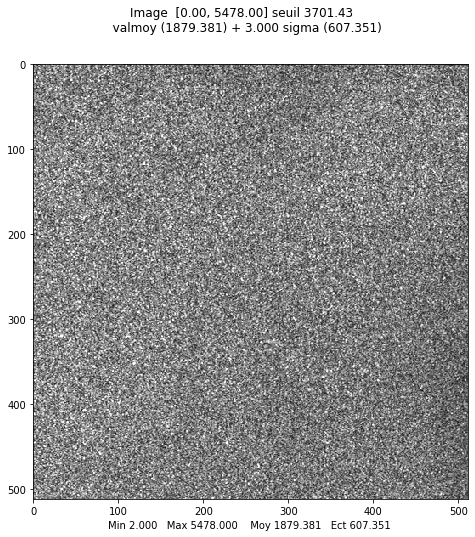

--- coeff var and L ---
0.3231652895539162
2.619111344462564


In [11]:
image = 'ERS_flevoland_mer.imw'
im_ers_mer = mvalab.imz2mat(pageweb+image)
mvalab.visusar(np.abs(im_ers_mer[0]))

# compute coefficient of variation and number of looks
amp_ers=np.abs(im_ers_mer[0])
m_ers= np.mean(amp_ers)
sigma_ers = np.std(amp_ers)
coeff_var_ers = sigma_ers/m_ers #complete
L_ers = np.square(0.523/coeff_var_ers) #complete
print('--- coeff var and L ---')
print(coeff_var_ers)
print(L_ers)

## D. Local coefficient of variation

The coefficient of variation $\gamma=\frac{\sigma}{\mu}$ (standard deviation normalized by the mean) is an indication of the local homogeneity of the scene. 
It can be computed locally around each pixel using a moving window.

### Question 4

Using 2D convolution to speed up the processing, compute the images of coefficient of variation. Comment the results of the image of local coefficient of variation and local standard deviation. Which structures of the image are highlighted with the coefficient of variation ? What is the influence of the window size ? 
Why the local standard deviation is not adapted to measure the local homogeneity of the scene ?



______________
### Answer 4
The image of coefficient of variation is an edge detector because it has high values in bright targets and edges between a bright and a dark field, and has low values at homogeneous areas such as the interior of fields. 

The window determines the size over which the image will be averaged, i.e. the pixel size of the new image. If the mask is too large, the image will be very blurred, and detail and information will be lost. If the mask size is larger than certain fields, the edges may not be well detected. If the mask is too small, the image of the variance is very noisy. The window size should be large enough to detect colour changes.

The local standard deviation detects bright spots well, but it is a poor detector of homogeneity. Indeed, bright fields are considered as heterogeneous.



### Answer 4

imz2mat : version janvier 2018.  Fichier à ouvrir : https://perso.telecom-paristech.fr/tupin/TPSAR/DATA/images/SentinelSLC_flevoland_centre.cxs
Nom compatible url
Nom compatible url
Complex short, Fichiers Unix
INFO - reading header/dim : https://perso.telecom-paristech.fr/tupin/TPSAR/DATA/images/SentinelSLC_flevoland_centre.dim
lecture .dim OK -> largeur:2048 hauteur:512 profondeur:1
Debug 2 2 2048
2 2048 >h
Affichage d'une image complexe : on prend le module
plt.show dans visusar : image 2048 x 512


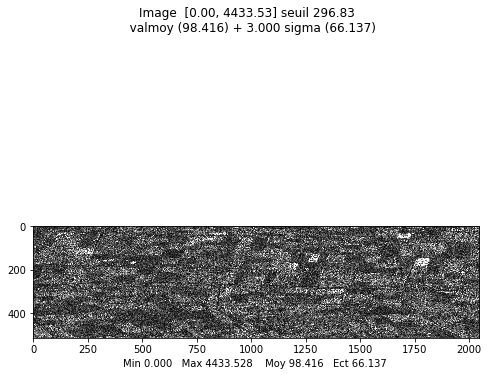

Affichage d'une image complexe : on prend le module
plt.show dans visusar : image 2048 x 512


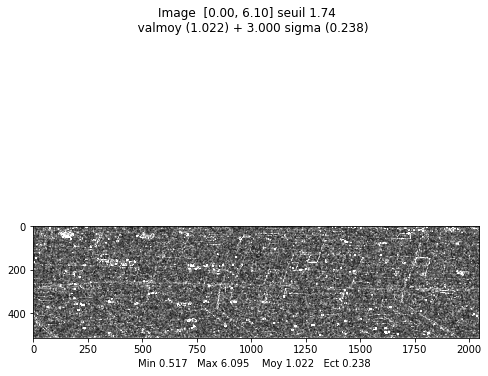

Affichage d'une image complexe : on prend le module
plt.show dans visusar : image 2048 x 512


<Figure size 576x576 with 0 Axes>

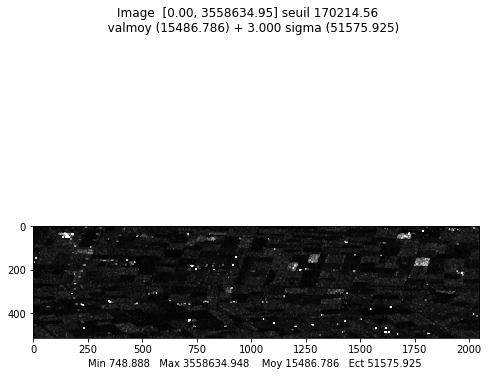

Text(0.5, 0.98, 'Standard deviation')

<Figure size 576x576 with 0 Axes>

In [55]:
# Select one of the following images: 
#'SentinelSLC_flevoland_centre.cxs', 
#'Alos_flevoland_centre.cxf',
#'ERS_flevoland_centre.imw'

image = 'SentinelSLC_flevoland_centre.cxs'
ima_slc = mvalab.imz2mat(pageweb+image)

# take the intensity 
ima_int = np.multiply(ima_slc[0], np.conj(ima_slc[0]))
# crop of the image to ease display and computation
mvalab.visusar(np.sqrt(ima_int))


# create the average window
size_window = 7
masque_loc = np.ones((size_window,size_window))/size_window**2

# compute the image of the local means in intensity
ima_int_mean = signal.convolve2d(ima_int,masque_loc,mode='same')

# compute the image of the local variances (var{I} = E{I^2} - E{I}^2)
ima_int_square = np.multiply(ima_int,ima_int) # I^2 
ima_int_mean_square = signal.convolve2d(ima_int_square,masque_loc,mode='same')# E{I^2}
ima_variance = ima_int_mean_square - np.multiply(ima_int_mean,ima_int_mean) 

# compute the image of the local coefficient of variation
ima_coeff_var = np.divide(np.sqrt(ima_variance),ima_int_mean)
mvalab.visusar(ima_coeff_var)
plt.suptitle(u'Coefficient of variation')

# plot the standard deviation: comment the result
mvalab.visusar(np.sqrt(ima_variance))
plt.suptitle(u'Standard deviation')

## E. Image despeckling: simple averaging and Lee filter

cThe local coefficient of variation is also used in a very famous filter for SAR images: the Lee filter. 
The principle of the filter is to combine the pixel value $I_s$ (intensity value of pixel $s$) and the local mean $\hat{\mu}_{s}$ depending on the local coefficient of variation $\hat{\gamma}_s$ with the following formula :
$$
  \hat{I}_s= \hat{\mu}_{s}+k_s (I_s-\hat{\mu}_{s})
$$

and
$$
  k_s=1- \frac{\gamma_{Sp}^2}{\hat{\gamma}_s^2}
$$

$\gamma_{Sp}$ is the theoretical value of the coefficient of variation for a pure speckle ($\gamma_{Sp}=\frac{1}{\sqrt{L}}$ for a L-look intensity image). For an SLC image, $L=1$.




### Question 5
Using the previous map, compute the resulting image with Lee filter. Comment the result and compare with a local mean. 

Warning : $k$ should be in $[0,1]$. 


_________
### Answer 5

With Lee's filter, the image is averaged, but there is still noise where the image was heterogeneous. In this case we keep the noisy values from the beginning, rather than averaging

The coefficient of variation is used to check if the area is homogeneous before averaging. If the area is not homogeneous, no averaging is performed

Compared to the local average, which is somewhat denoised but blurred, Lee's filter is better, as it better preserves the edges and bright spots. These points are in effect preserved thanks to ks.


### Answer 5

Affichage d'une image complexe : on prend le module
plt.show dans visusar : image 2048 x 512


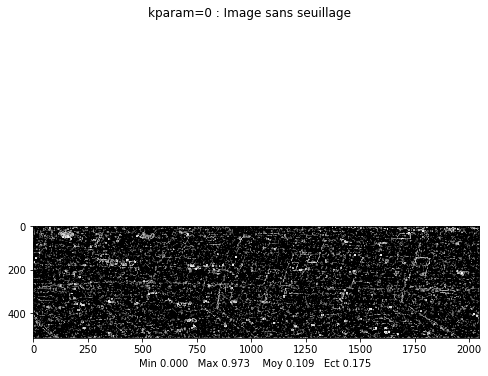

Affichage d'une image complexe : on prend le module
plt.show dans visusar : image 2048 x 512


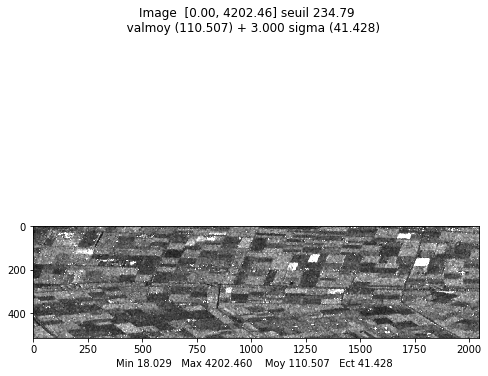

Affichage d'une image complexe : on prend le module
plt.show dans visusar : image 2048 x 512


<Figure size 576x576 with 0 Axes>

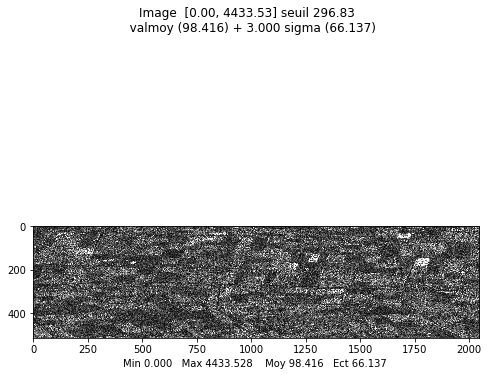

Text(0.5, 0.98, 'Original image')

<Figure size 576x576 with 0 Axes>

In [57]:
# compute ks, by taking ima_coeff_var previously computed
ks = 1-(1/np.square(ima_coeff_var)) #complete

# force k to have values comprised in the range [0,1]
ks[ks<0]=0
mvalab.visusar(ks,0)

# filter the image
image_lee_filtered = ima_int_mean+np.multiply(ks,ima_int-ima_int_mean) #complete
mvalab.visusar(np.sqrt(image_lee_filtered))
plt.suptitle(u'Image denoised using Lee filter')
mvalab.visusar(np.sqrt(ima_int))
plt.suptitle(u'Original image')

Affichage d'une image complexe : on prend le module
plt.show dans visusar : image 2048 x 512


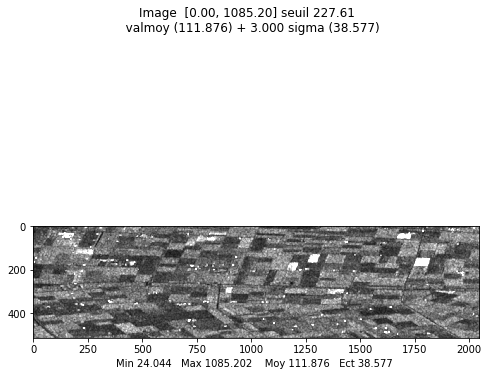

array([[ 41.74411849,  50.41116656,  50.97178091, ...,  95.74551729,
         92.44225997,  77.09826754],
       [ 45.42003514,  53.5803802 ,  54.72994927, ..., 110.86515067,
        106.82113603,  90.46681656],
       [ 52.3157603 ,  59.57845111,  60.68116744, ..., 122.12781862,
        114.3730916 ,  96.71966645],
       ...,
       [ 85.91464678,  90.75555866, 108.26959925, ...,  86.94743897,
         80.36028565,  71.93548697],
       [ 81.41616447,  85.92913549, 103.13850406, ...,  76.21733158,
         69.35975425,  60.80866614],
       [ 74.89979701,  79.40210248,  97.68441482, ...,  64.41526629,
         56.94196831,  47.29434535]])

In [53]:
# compare it with a local mean
mvalab.visusar(np.sqrt(ima_int_mean))

### Filtering of image "Lely" and comparison with a deep learning algorithm
Repeat the process done above to denoise a crop of image "Lely" using the Lee filter. Then, compare it with the result of a deep learning algorithm called SAR-CNN.

Affichage d'une image reelle
plt.show dans visusar : image 512 x 512


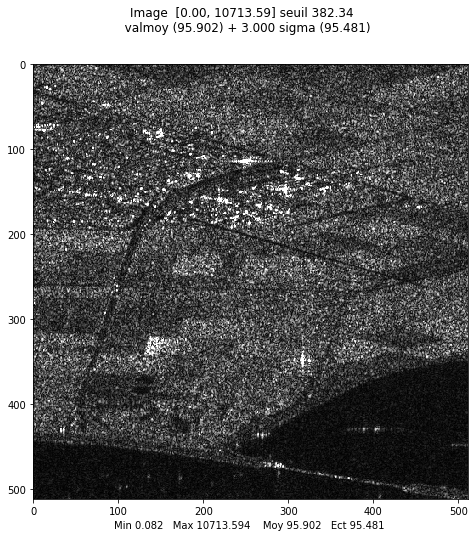

Affichage d'une image complexe : on prend le module
plt.show dans visusar : image 512 x 512


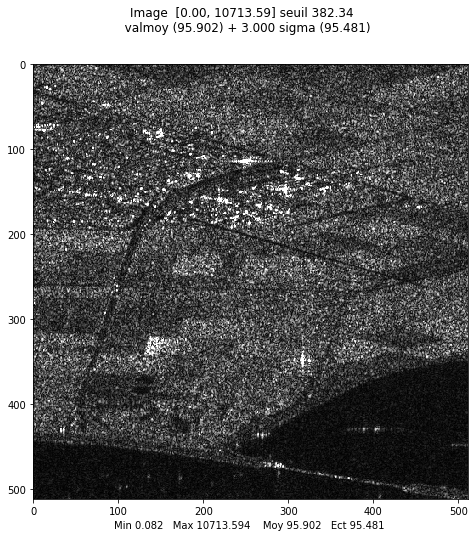

Affichage d'une image complexe : on prend le module
plt.show dans visusar : image 512 x 512


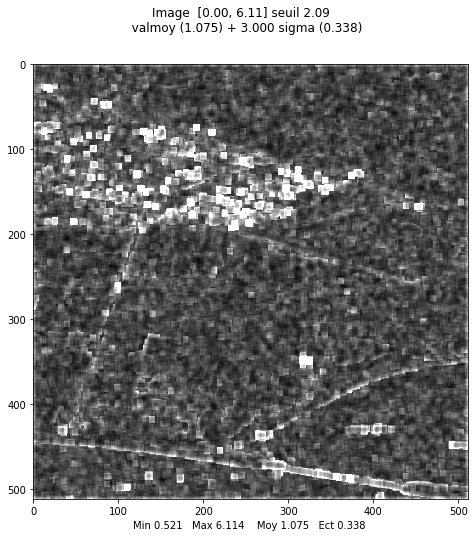

array([[2.024911  , 1.76545624, 1.57604367, ..., 1.82503469, 2.01814577,
        1.9747593 ],
       [1.8841218 , 1.63487194, 1.45207031, ..., 1.49113729, 1.62695427,
        1.80512162],
       [1.62844623, 1.40549696, 1.20649631, ..., 1.20876045, 1.35517437,
        1.54139508],
       ...,
       [1.84613196, 1.59402411, 1.35276337, ..., 1.26860605, 1.45185894,
        1.73182814],
       [2.08728935, 1.8716578 , 1.58186995, ..., 1.45345336, 1.62614844,
        1.9081426 ],
       [2.08728935, 2.08728935, 1.9468511 , ..., 1.74705201, 1.8528438 ,
        2.08728935]])

In [65]:
# REPEAT THE PROCESS WITH THE CROP FROM LELY
plt.rcParams['figure.figsize'] = [8, 8]
x = 470
y = 2230
pat_size = 512
lely_crop_slc = im_slc_senti_lely[x : x+pat_size, y : y+pat_size]
mvalab.visusar(np.abs(lely_crop_slc))

# take the intensity 
ima_int = np.multiply(lely_crop_slc, np.conj(lely_crop_slc))
mvalab.visusar(np.sqrt(ima_int));

# create the average window
size_window = 7
masque_loc = np.ones((size_window,size_window))/(size_window*size_window)

# compute the mean image
ima_int_mean = signal.convolve2d(ima_int,masque_loc,mode='same')

# compute the variance image (var{I} = E{I^2} - E{I}^2)
ima_int_square = np.multiply(ima_int,ima_int) # I^2 
ima_int_mean_square =  signal.convolve2d(ima_int_square,masque_loc,mode='same') # E{I^2}
ima_variance = ima_int_mean_square-np.multiply(ima_int_mean,ima_int_mean) 

# compute coefficient of variation
ima_coeff_var = np.divide(np.sqrt(ima_variance),ima_int_mean)
mvalab.visusar(ima_coeff_var)


Affichage d'une image complexe : on prend le module
plt.show dans visusar : image 512 x 512


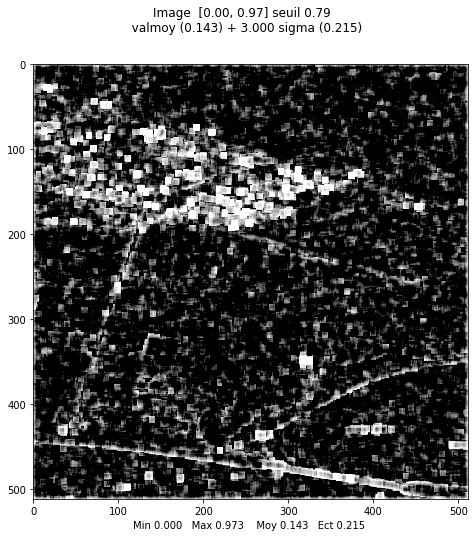

Affichage d'une image complexe : on prend le module
plt.show dans visusar : image 512 x 512


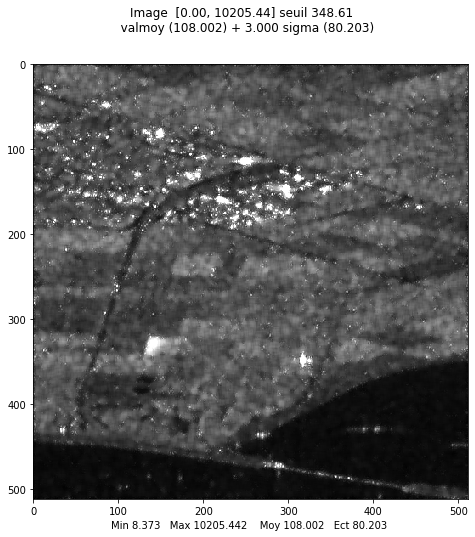

Affichage d'une image complexe : on prend le module
plt.show dans visusar : image 512 x 512


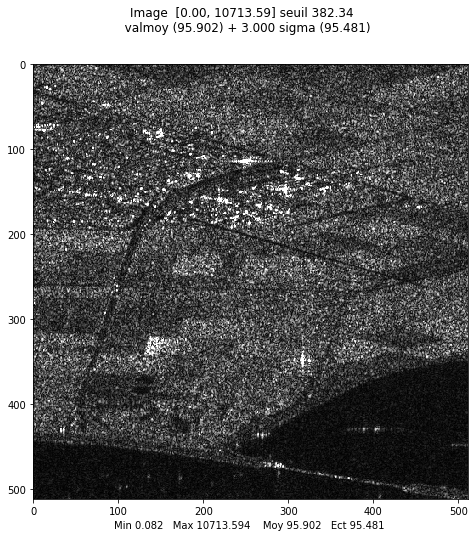

array([[ 92.71543266, 147.71684551, 164.6952991 , ...,  34.41350567,
        110.30000318,  83.78819588],
       [117.7268095 ,  63.03001534,  52.87571242, ...,  86.71877349,
         93.07940826,  47.82943242],
       [154.25865679,  30.0768569 , 114.12935955, ..., 109.67807511,
         86.04262238, 170.12941953],
       ...,
       [ 17.34264163,  32.83225461,   8.48583645, ...,   3.46383497,
         40.44141234,  76.57551112],
       [ 16.78256893,  26.69342267,   7.47629174, ...,  24.88798432,
         26.58382981, 104.37209603],
       [ 56.90790129,   6.38627296,  27.9057191 , ..., 108.98602108,
         19.44465247,  93.92793494]])

In [66]:
# compute ks, by taking ima_coeff_var previously computed
ks = 1-(1/np.square(ima_coeff_var))

# force k to have values comprised in the range [0,1]
ks[ks<0]=0
mvalab.visusar(ks)

# filter the image
image_lee_filtered = ima_int_mean+np.multiply(ks,ima_int-ima_int_mean)
mvalab.visusar(np.sqrt(image_lee_filtered))
mvalab.visusar(np.sqrt(ima_int))

### Denoised image: SAR2SAR
The Lee filter presents some limits. More recent approaches to suppress noise rely on sofisticated algorithms. You can plot the image of Lely denoised using a deep learning algorthm called SAR2SAR and compare visually the result with the image filtered using the Lee filter.
  

--2022-03-14 13:58:28--  https://perso.telecom-paristech.fr/dalsasso/TPSAR/pilelely/denoised_SAR2SAR/lely_tuple_multitemp_SAR2SAR.IMA
Resolving perso.telecom-paristech.fr (perso.telecom-paristech.fr)... 137.194.22.227, 2a04:8ec0:0:a::89c2:16e3
Connecting to perso.telecom-paristech.fr (perso.telecom-paristech.fr)|137.194.22.227|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26214400 (25M)
Saving to: ‘lely_tuple_multitemp_SAR2SAR.IMA’

lely_tuple_multitem 100%[===================>]  25.00M  12.4MB/s    in 2.0s    

2022-03-14 13:58:31 (12.4 MB/s) - ‘lely_tuple_multitemp_SAR2SAR.IMA’ saved [26214400/26214400]

--2022-03-14 13:58:31--  https://perso.telecom-paristech.fr/dalsasso/TPSAR/pilelely/denoised_SAR2SAR/lely_tuple_multitemp_SAR2SAR.dim
Resolving perso.telecom-paristech.fr (perso.telecom-paristech.fr)... 137.194.22.227, 2a04:8ec0:0:a::89c2:16e3
Connecting to perso.telecom-paristech.fr (perso.telecom-paristech.fr)|137.194.22.227|:443... connected.
HTTP reque

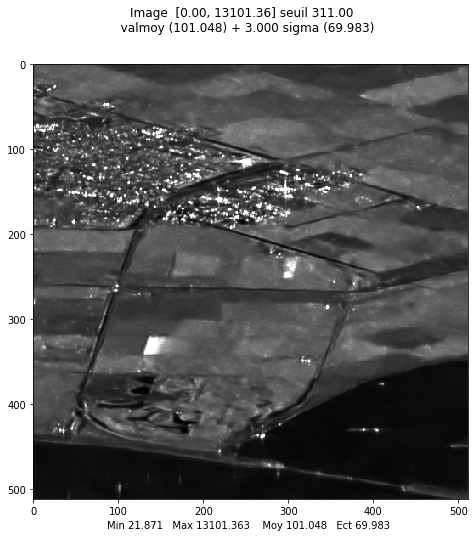

array([[108.26735687, 108.92593384, 117.21216583, ...,  87.13925171,
         89.79171753,  89.75721741],
       [105.54544067, 111.25749207, 116.15348053, ...,  95.23865509,
         96.19988251,  95.58480072],
       [105.72384644, 114.29315186, 116.50016022, ..., 100.59217072,
        100.78230286, 100.22771454],
       ...,
       [ 40.31035233,  38.88003159,  38.09856415, ...,  82.76222992,
         81.49038696,  81.83437347],
       [ 39.99552917,  38.5390358 ,  38.96235657, ...,  84.42482758,
         84.06273651,  83.64545441],
       [ 40.69298935,  38.59126282,  38.61891174, ...,  81.21070862,
         82.10493469,  87.46295166]])

In [54]:
!wget https://perso.telecom-paristech.fr/dalsasso/TPSAR/pilelely/denoised_SAR2SAR/lely_tuple_multitemp_SAR2SAR.IMA
!wget https://perso.telecom-paristech.fr/dalsasso/TPSAR/pilelely/denoised_SAR2SAR/lely_tuple_multitemp_SAR2SAR.dim
im_lely_multitemp_denoised = mvalab.imz2mat('lely_tuple_multitemp_SAR2SAR.IMA')
im1_d = np.abs(im_lely_multitemp_denoised[0][:,:,0]) #amplitude
mvalab.visusar(im1_d)

##Question 6
Do a comparison between the CNN filetring and the Lee filter. Comment the two results. Are homogeneous areas well restored? Do the method preserve edges and fine structures? Are artifacts introduced?

____________
### Answer 6

Lee's filter keeps noise, even in homogeneous areas, and even more in areas with a lot of bright spots

On the contrary, the CNN filter smoothes too much the homogeneous areas, like the fields, which makes the image too blurred. On the other hand, the CNN filter filters well the areas with a lot of backscatter.

## F. Method noise
Performances of a denoising algorithm can be visually interpreted by looking at the *residual noise* (i.e. the ratio between the noisy image and the denoised image, in intensity). For a quantitative evaluation, we can look at the noise statistics, knowing that, in intensity, statistics of speckle S are:
- $\mu_S=1$
- $\sigma^2_S = \frac{1}{L}$

### Question 7
Compute the aforementioned ratio image, mean value and variance for the image restored using the Lee filter and the result of SAR-CNN. Comment the results.

What is the interest of computing the method noise ? What are your conclusions for the two previous filters ?

### Answer 7

Affichage d'une image complexe : on prend le module
plt.show dans visusar : image 512 x 512


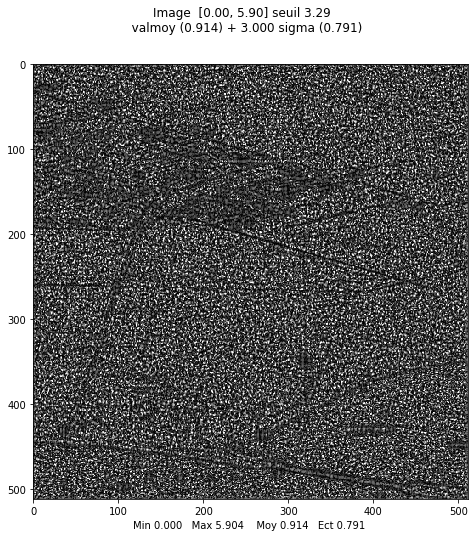

/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:852: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:905: ComplexWarning: Casting complex values to real discards the imaginary part
  db = np.array(np.diff(bin_edges), float)
/usr/local/lib/python3.7/dist-packages/matplotlib/transforms.py:789: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
/usr/local/lib/python3.7/dist-packages/matplotlib/transforms.py:1969: ComplexWarning: Casting complex values to real discards the imaginary part
  x, y = float(x), float(y)


LEE FILTER: mean = (0.9136191949624323+0j) and var = 0.6262534577223812
Affichage d'une image complexe : on prend le module
plt.show dans visusar : image 512 x 512


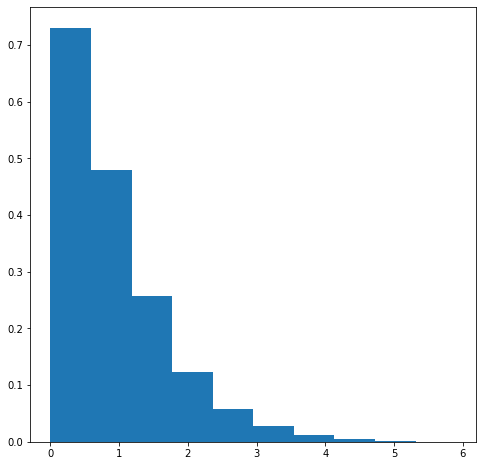

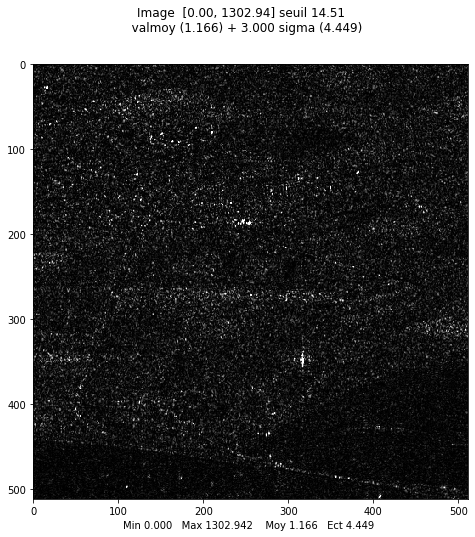

SAR2SAR: mean = (1.165599951708626+0j) and var = 19.792265460574534


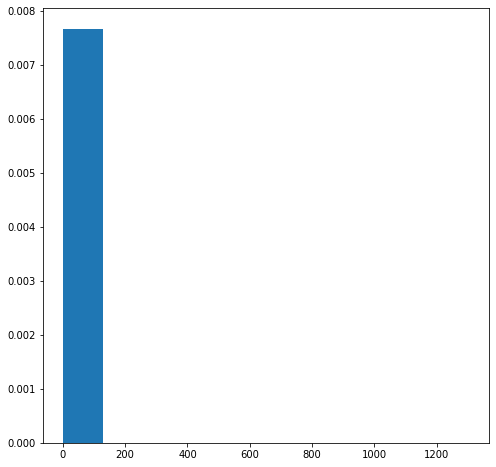

In [73]:
# Plot the residual noise
res_noise_lee = ima_int/image_lee_filtered
mvalab.visusar(res_noise_lee)
plt.hist(res_noise_lee.flatten(),density='True')
mean_lee = np.mean(res_noise_lee)
var_lee = np.var(res_noise_lee)
print('LEE FILTER: mean = '+str(mean_lee)+' and var = '+str(var_lee))


res_noise_deep = ima_int/(np.square(im_lely_multitemp_denoised[0][:,:,0]))
mvalab.visusar(res_noise_deep)
plt.hist(res_noise_deep.flatten(),density='True')
mean_deep = np.mean(res_noise_deep)
var_deep = np.var(res_noise_deep)
print('SAR2SAR: mean = '+str(mean_deep)+' and var = '+str(var_deep))

On Lee's filter, the dark areas correspond to the areas that were not denoised, where ks was high. The edges appear dark in the image, as they are areas of high variance. The average is less than 1, because some areas have not been transformed, so the filter is biased.

For the deep learning method, the denoising is more homogeneous, but we can see some contours. The average is very close to 1, which shows that the denoising is not biased, but the variance is greater than the expected result.

We can see that the histograms do not correspond exactly to the expected Rayleigh distribution.